<a href="https://colab.research.google.com/github/RafaelColin/EDP/blob/main/Copia_de_M%C3%A9todo_de_Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color = red>Método implícito de Crank-Nicolson


##Use los tamaños de paso  $ h =0.1$ y $ k=0.01$ para aproximar la solucion de la ecuacion de calor

$$\frac{\partial U}{\partial t}(x,t) = \frac{\partial^2 U}{\partial x^2}(x,t), 0<x<1 y  0 \leq t $$

##con condiciones de frontera:

$$u(0,t) = u(1,t) = 0 , 0<t, $$

##y condiciones iniciales:

$$u(x,0) = 1-4*( x-1/2 )^2. $$

##La ecuación en diferencias para el método implícito estándar es:

$$\frac{u_{i,j+1} - u_{i,j}}{k} = \frac{1}{2}[\frac{u_{i+1,j+1} - 2u_{i,j+1} + u_{i-1,j+1}}{h^2} + [\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2}]$$
##Reorganizando, se obtiene:

$$-ru_{i-1,j+1} +(2 + 2r) u_{i,j+1} - r u_{i+1,j+1} = ru_{i-1,j}+(2-2r)u_{i,j} + r u_{i+1,j}$$

##donde $$r= \alpha^2 \frac{k}{h^2}$$ y lo que conocido es  $$ru_{i-1,j}+(2-2r)u_{i,j} + r u_{i+1,j}$$

##Librerias


In [ ]:
import sympy as sp #SymPy es una librería para matemáticas simbólicas. Permite trabajar con variables algebraicas, ecuaciones, derivadas, integrales, etc.,
import numpy as np #NumPy es la librería fundamental para cálculo numérico en Python. Proporciona arrays multidimensionales, funciones matemáticas, operaciones de álgebra lineal, etc.
import math #Para cálculos matemáticos en la solución exacta
import matplotlib.pyplot as plt# Matplotlib es la librería estándar para crear visualizaciones en 2D y 3D.
                                # pyplot es un módulo que ofrece una interfaz similar a MATLAB para generar gráficos
from mpl_toolkits.mplot3d import Axes3D # Habilita la creación de gráficos tridimensionales (ejes 3D) en Matplotlib
from matplotlib import cm #cm (colormaps) proporciona mapas de colores para visualizar datos en 2D/3D
                          #Útil para asignar colores a superficies según valores numéricos

from tabulate import tabulate #Para mostrar resultados numéricos de forma organizada, como:

##Definimos una función Principal.

In [ ]:
def f(x):
  return 1-4*( ( x-1/2 )**2)

##Creamos la grafica de la funcion


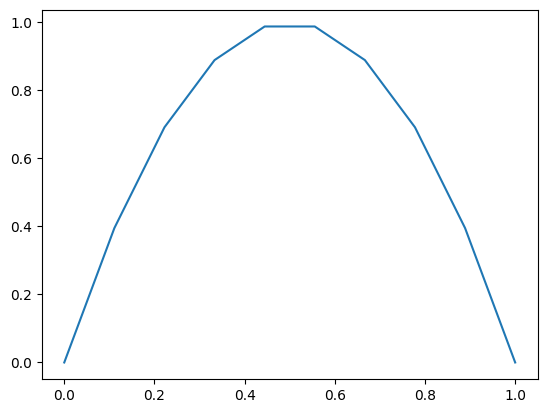

In [ ]:
x = np.linspace(0,1,10)
plt.plot(x,f(x))

##Construcción de las Matrizes A y B para el método de Crank-Nicolson

In [ ]:
def tridiagonal(n, a, b):
  return sp.Matrix([
      [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
      for i in range(n)
  ])

In [ ]:
r = 1

## Mostramos a la  Matriz A

In [ ]:
A = tridiagonal(9,2+2*r,-r) #crea a la Matriz A

In [ ]:
A #Llama a la Matriz A para mostrarla

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

## Mostramos a la  Matriz B

In [ ]:
B = tridiagonal(9,2-2*r,r)#Crea a la Matriz B

In [ ]:
B #Llama a la Matriz B para mostrarla

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

##Creamos un vector columna que evalúa la función en puntos específicos

In [ ]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)]) # Crear el vector b usando comprensión de lista

In [ ]:
b  #Llama al vector b y lo muestra

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

##Método de Crank-Nicolson para resolver el sistema evolutivo

In [ ]:
def crank_nicolson(A, B, b, j):
    b_1 = B*b    # mismo paso inicial de tu función
    S = []       # aquí guardaremos cada solución

    for i in range(j):
        sol = A.LUsolve(b_1)    # u^{n+1}
        S.append(sol.T)         # guardar fila (como vector renglón)
        b_1 = B*sol             # preparar siguiente paso

    # Convertir lista de vectores sympy a una matriz sympy
    return sp.Matrix(S)

##Solucion Numerica

In [ ]:
j = 50 #Numero de pasos en el tiempo

In [ ]:
U = crank_nicolson(A, B, b, j)

##Tabla de los reslutados de la solucion numerica

In [ ]:
data = [list( U.row(i)) for i in range(10)]

print(tabulate(data, tablefmt = "grid"))

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

##Sacamos el ultimo reglon de la tabla de la solucion numerica

In [ ]:
# Mostrar solo la último reglon
print(tabulate([data[-1]], tablefmt="grid"))

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.119736 | 0.227748 | 0.313462 | 0.368491 | 0.387452 | 0.368491 | 0.313462 | 0.227748 | 0.119736 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+


##Graficamos los puntos de la solucion numerica  

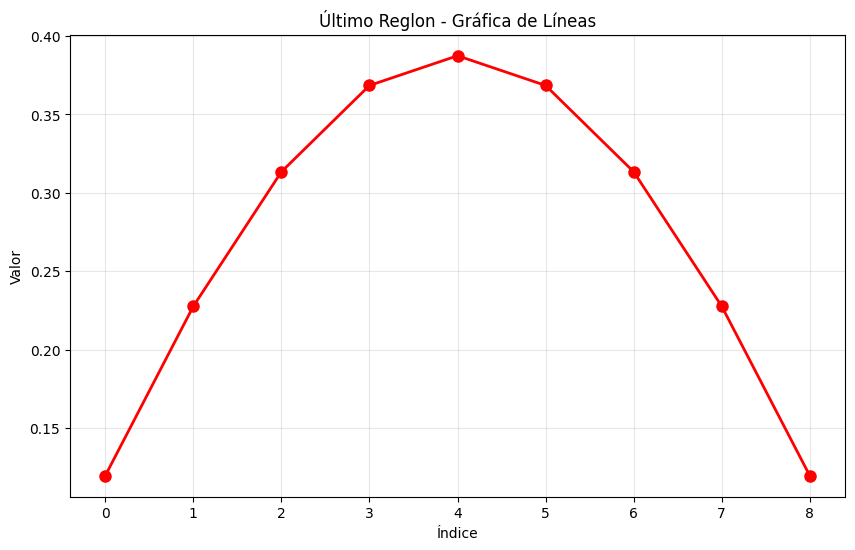

In [ ]:
# Obtener el último resultado
ultimo_resultado = data[-1]

# Crear gráfica
plt.figure(figsize=(10, 6))
plt.plot(ultimo_resultado, marker='o', linewidth=2, markersize=8, color="red")
plt.title('Último Reglon - Gráfica de Líneas')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True, alpha=0.3)
plt.show()

##Damos los parametros para calcular la solucion exacta

In [ ]:
#Parametros
h = 0.1
k = 0.01  # Paso de tiempo asumido para j=10 y t=0.1
num_time_steps = 10  # Número de pasos de tiempo a calcular

# Puntos espaciales desde 0 hasta 1 inclusive
x = np.linspace(0, 1, int(1/h) + 1)

# Tiempos para los primeros 10 pasos
times = [i * k for i in range(1, num_time_steps+1)]

def solucion_exacta(x, t, n_terms=50):
    u = np.zeros_like(x)
    for n in range(1, n_terms + 1, 2):  # Solo términos impares
        B_n = 32 / ((n * math.pi) ** 3)
        term = B_n * np.sin(n * math.pi * x) * np.exp(-(n * math.pi) ** 2 * t)
        u += term
    return u

# Calcular la solución exacta para cada tiempo
data_exacta = []
for t in times:
    u_exacta = solucion_exacta(x, t)
    # Seleccionar solo los puntos de 0.1 a 0.9 (índices 1 a 9)
    u_exacta_interior = u_exacta[1:-1]  # Corregido: u_exacta en lugar de u_exact
    data_exacta.append(list(u_exacta_interior))

# Imprimir en formato de tabla
print(tabulate(data_exacta, tablefmt="grid"))  # Corregido: data_exacta en lugar de data_exact


+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.302389 | 0.564543 | 0.760642 | 0.880061 | 0.920008 | 0.880061 | 0.760642 | 0.564543 | 0.302389 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.267085 | 0.50411  | 0.68732  | 0.801911 | 0.840768 | 0.801911 | 0.68732  | 0.50411  | 0.267085 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.239346 | 0.45369  | 0.621784 | 0.728427 | 0.764902 | 0.728427 | 0.621784 | 0.45369  | 0.239346 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.215783 | 0.409799 | 0.562945 | 0.660741 | 0.694327 | 0.660741 | 0.562945 | 0.409799 | 0.215783 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195065 | 0.370771 | 0.509872 | 0.598962 | 0.629614 | 0.598962 | 0.509872 | 0.370771 | 0

##Calculamos la solucion exacta y mostramos la tabla

In [ ]:
def solucion_exacta(x, t, n_terms=50):
    u = np.zeros_like(x)
    for n in range(1, n_terms + 1, 2):  # Solo términos impares
        B_n = 32 / ((n * math.pi) ** 3)
        term = B_n * np.sin(n * math.pi * x) * np.exp(-(n * math.pi) ** 2 * t)
        u += term
    return u

# Calcular la solución exacta para cada tiempo
data_exacta = []
for t in times:
    u_exacta = solucion_exacta(x, t)
    # Seleccionar solo los puntos de 0.1 a 0.9 (índices 1 a 9)
    u_exacta_interior = u_exacta[1:-1]
    data_exacta.append(list(u_exacta_interior))

# Imprimir en formato de tabla
print(tabulate(data_exacta, tablefmt="grid"))

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.302389 | 0.564543 | 0.760642 | 0.880061 | 0.920008 | 0.880061 | 0.760642 | 0.564543 | 0.302389 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.267085 | 0.50411  | 0.68732  | 0.801911 | 0.840768 | 0.801911 | 0.68732  | 0.50411  | 0.267085 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.239346 | 0.45369  | 0.621784 | 0.728427 | 0.764902 | 0.728427 | 0.621784 | 0.45369  | 0.239346 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.215783 | 0.409799 | 0.562945 | 0.660741 | 0.694327 | 0.660741 | 0.562945 | 0.409799 | 0.215783 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195065 | 0.370771 | 0.509872 | 0.598962 | 0.629614 | 0.598962 | 0.509872 | 0.370771 | 0

####Sacamos el ultimo reglon de la tabla de la solucion exacta

In [ ]:
print(tabulate([data_exacta[-1]], tablefmt="grid"))

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.118869 | 0.226098 | 0.311192 | 0.365823 | 0.384647 | 0.365823 | 0.311192 | 0.226098 | 0.118869 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+


##Graficamos los puntos de la solucion exacta

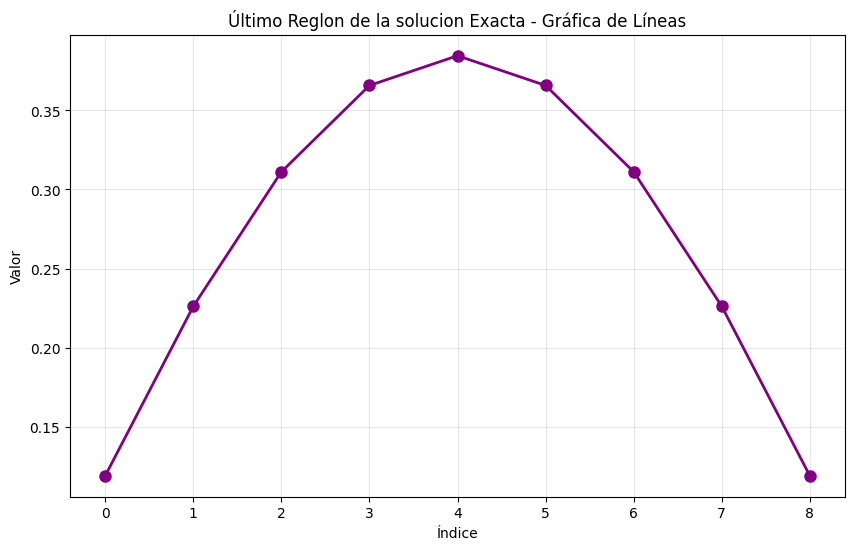

In [ ]:
ultimo_resultado = data_exacta[-1]

# Crear gráfica
plt.figure(figsize=(10, 6))
plt.plot(ultimo_resultado, marker='o', linewidth=2, markersize=8, color="purple")
plt.title('Último Reglon de la solucion Exacta - Gráfica de Líneas')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True, alpha=0.3)
plt.show()

##Comparamos graficamente los resultados

lo hice con t=0.5 para que se viera un poco distinto ya que si lo hacia con t=0.1 iban a que dar las graficas encimadas

In [ ]:
# Número de pasos de tiempo desde la celda anterior
t_final = j * k # Tiempo total alcanzado por la simulación numérica

# Definir x_interior para los puntos de 0.1 a 0.9
x_interior = np.linspace(0.1, 0.9, 9)

x_grafica = np.linspace(0, 1, 100)
# Calcular la solución exacta para todo el dominio espacial [0, 1] en t_final
u_exacta_grafica = solucion_exacta(x_grafica, t_final)

# Puntos espaciales para la solución numérica (de 0.1 a 0.9)
x_puntos = np.linspace(0.1, 0.9, U_np.shape[1]) # U_np tiene 9 columnas para x_i

# Solución numérica en el paso de tiempo final
u_numerica_final = U_np[-1, :]

plt.figure(figsize=(12, 6))

# Gráfica de la solución completa
plt.subplot(1, 2, 1)
plt.plot(x_grafica, u_exacta_grafica, 'r-', label='Solución exacta', linewidth=2)
plt.plot(x_puntos, u_numerica_final, 'bo-', label='Solución numérica (Crank-Nicolson)', markersize=6)
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title(f'Comparación de soluciones en t = {t_final}')
plt.legend()
plt.grid(True)

# Agregar un segundo subgráfico para el error absoluto
# Calcular el error absoluto en los puntos interiores (0.1 a 0.9)
# Primero, obtener la solución exacta en los puntos espaciales numéricos
u_exacta_at_numeric_x = solucion_exacta(x_puntos, t_final)
absolute_error = np.abs(u_numerica_final - u_exacta_at_numeric_x)

# Gráfica del error
plt.subplot(1, 2, 2)
plt.plot(x_puntos, absolute_error, 'go-', label='Error absoluto', markersize=6)
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.title(f'Error absoluto en t = {t_final}')
plt.grid(True)

plt.tight_layout()
plt.show()


NameError: name 'U_np' is not defined

##Comparacion entres la solucion numerica y la exacta
##Calculamos el error
##Motramos la tabla

In [ ]:
# Solución exacta en t=0.1
t_final = 0.1
x_interior = np.linspace(0.1, 0.9, 9)  # Definir x_interior
u_exacta_final = solucion_exacta(x_interior, t_final)

# Solución Crank-Nicolson en el último paso (fila 9)
u_crank_final = data[9]  # Última fila de tu tabla numérica

# Crear tabla comparativa con error
tabla_comparativa = []
for i in range(len(x_interior)):
    error = abs(u_exacta_final[i] - u_crank_final[i])
    tabla_comparativa.append([
        x_interior[i],
        u_exacta_final[i],
        u_crank_final[i],
        error
    ])

# Mostrar tabla
print("Comparación: Solución Exacta vs Crank-Nicolson (t=0.1)")
print(tabulate(tabla_comparativa,
               headers=["x", "Exacta", "Crank-Nicolson", "Error Absoluto"],
               tablefmt="grid",
               floatfmt=".6f"))

# Calcular estadísticas del error
error_max = max([fila[3] for fila in tabla_comparativa])
error_promedio = np.mean([fila[3] for fila in tabla_comparativa])
print(f"\nEstadísticas del error:")
print(f"Error máximo: {error_max:.6f}")  # Corregido: formato
print(f"Error promedio: {error_promedio:.6f}")  # Corregido: formato

Comparación: Solución Exacta vs Crank-Nicolson (t=0.1)
+----------+----------+------------------+------------------+
|        x |   Exacta |   Crank-Nicolson |   Error Absoluto |
+==========+==========+==================+==================+
| 0.100000 | 0.118869 |         0.119736 |         0.000867 |
+----------+----------+------------------+------------------+
| 0.200000 | 0.226098 |         0.227748 |         0.001650 |
+----------+----------+------------------+------------------+
| 0.300000 | 0.311192 |         0.313462 |         0.002270 |
+----------+----------+------------------+------------------+
| 0.400000 | 0.365823 |         0.368491 |         0.002668 |
+----------+----------+------------------+------------------+
| 0.500000 | 0.384647 |         0.387452 |         0.002805 |
+----------+----------+------------------+------------------+
| 0.600000 | 0.365823 |         0.368491 |         0.002668 |
+----------+----------+------------------+------------------+
| 0.700000 | 0.

In [ ]:
U_np = np.array(U.tolist(), dtype=float)

In [ ]:
x = np.linspace(0, 1, 9) #np.linspace() Crea un array de números equiespaciados en un intervalo:
y = np.linspace(0, 0.1, j)  # Corregido: 0.1 en lugar de 0.5 para que coincida con el tiempo real
X,Y = np.meshgrid(x, y) #np.meshgrid() Crea matrices de coordenadas a partir de vectores 1D

Creamos una visualización gráfica de una solución numérica para un problema de Dirichlet usando un mapa de colores para visualizar el maximo y el minimo de la solución

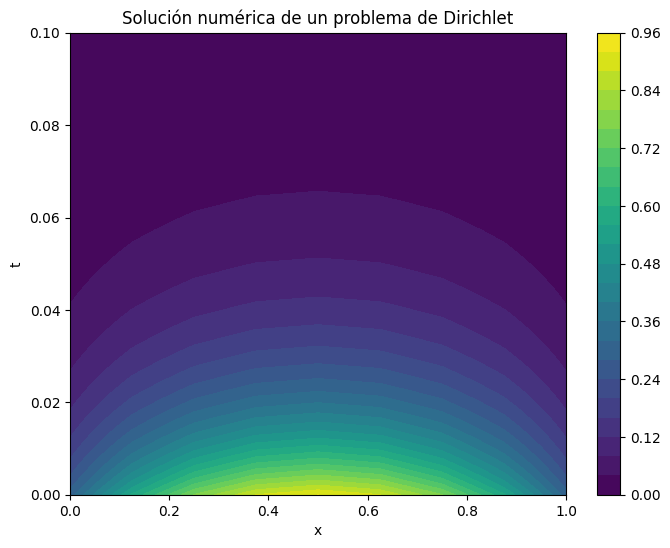

In [ ]:
# Mapa de colores
plt.figure(figsize=(8, 6)) #Crea una nueva figura para el gráfico
                            # figsize: (ancho, alto)

# Corregir: usar Y_correcto en lugar de Y para que coincida con el tiempo real
y_correcto = np.linspace(0, 0.1, j)  # Tiempo de 0 a 0.1
X_correcto, Y_correcto = np.meshgrid(x, y_correcto)

contour = plt.contourf(X_correcto, Y_correcto, U_np, levels=25, cmap=cm.viridis) #Crea un mapa de contornos relleno (filled contours):
                                                            #X, Y: Coordenadas de la malla
                                                            #U: Valores de la función en cada punto
                                                            #levels: Número de niveles de contorno
                                                            #cmap: Esquema de colores
plt.colorbar(contour) #Añade una barra de colores que muestra la escala:
plt.title('Solución numérica de un problema de Dirichlet') #Añade un título al gráfico
plt.xlabel('x') #Etiquetan los ejes
plt.ylabel('t') #Etiqueta corregida: debe ser 't' (tiempo) en lugar de 'y'
plt.axis('auto') #Configura los límites de los ejes automáticamente
plt.show() #Muestra el gráfico en pantalla

Creamos una visualización gráfica en 3D de una solución numérica para un problema de Dirichlet usando un mapa de colores para visualizar el maximo y el minimo de la solución

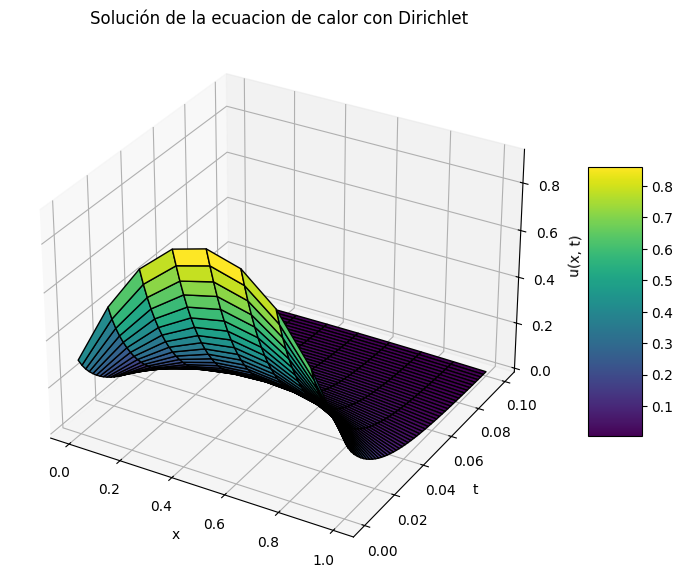

In [ ]:
fig = plt.figure(figsize=(10, 7)) #Crea una nueva figura para el gráfico
                                  # figsize: (ancho, alto)
ax = fig.add_subplot(111, projection='3d') #Crea un sistema de ejes 3D dentro de una figura
                                           # (111)Notación de MATLAB para "1 fila, 1 columna, subplot 1"
                                           # projection='3d'Especifica que queremos ejes tridimensionales

# Usar las coordenadas corregidas
surf = ax.plot_surface(X_correcto, Y_correcto, U_np, cmap=cm.viridis, edgecolor='k') #Dibuja una superficie 3D
                                                                #X, Y, U: Coordenadas y valores de la superficie
                                                                #cmap: Mapa de colores para visualizar los valores
                                                                #edgecolor: Color de las líneas de la malla ('k' = negro, 'none' = sin líneas)
ax.set_title('Solución de la ecuacion de calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('t')  # Corregido: debe ser 't' (tiempo)
ax.set_zlabel('u(x, t)')  # Corregido: debe ser 'u(x, t)'
fig.colorbar(surf, shrink=0.5, aspect=5) #Añade una barra de colores para la superficie
                                         #surf: La superficie a la que se referencia la barra
                                         #shrink: Factor de escala del tamaño (0.0-1.0)
                                         #aspect: Relación de aspecto (ancho/alto)
plt.show() #Muestra el gráfico en pantalla

Creamos una visualización gráfica en 3D de la compracion de solución numérica  y de la solucion exacta para un problema de Dirichlet usando un mapa de colores para visualizar el maximo y el minimo de la solución

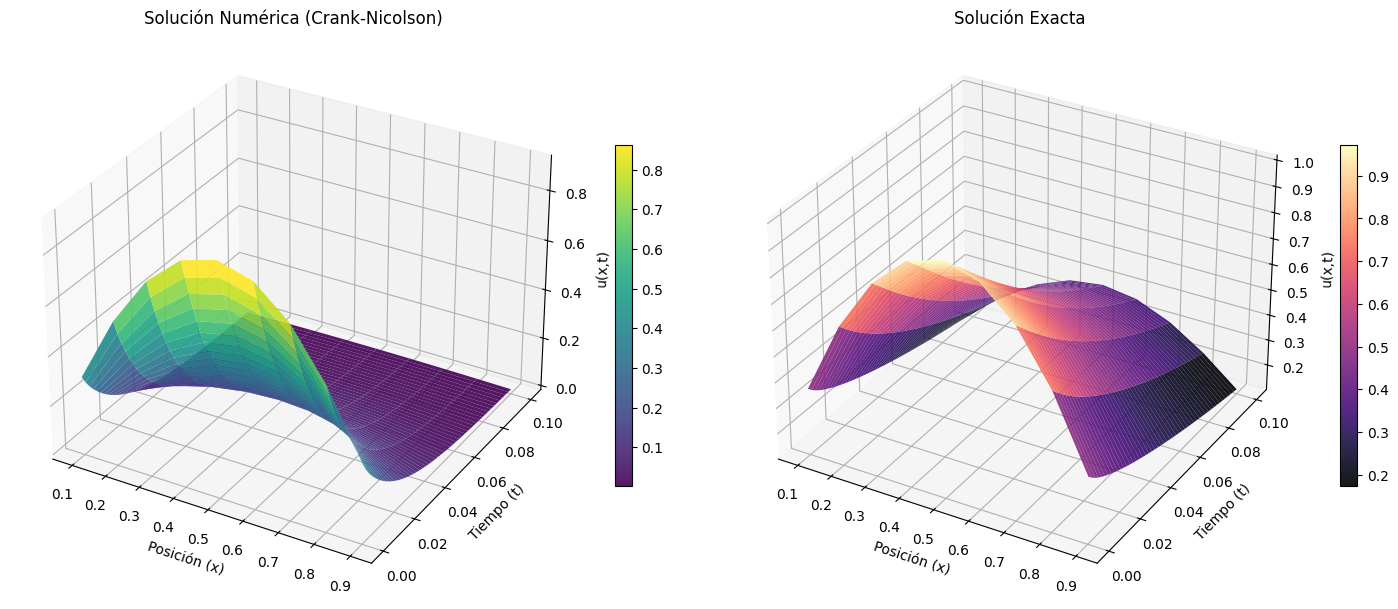

In [ ]:
# Celda 27 - CORREGIDA
# Gráfica comparativa en 3D
fig = plt.figure(figsize=(15, 6))

# Definir coordenadas espaciales y temporales CORRECTAS
# x_values: puntos espaciales de 0.1 a 0.9 (9 puntos)
x_values = np.linspace(0.1, 0.9, 9)
# t_values: tiempos de 0 a 0.1 (j=10 pasos)
t_values = np.linspace(0, 0.1, j)

# Crear malla para graficar
X_plot, T_plot = np.meshgrid(x_values, t_values)

# Calcular U_exact_plot en la misma cuadrícula para comparar
U_exact_plot = np.zeros_like(U_np, dtype=float)
for i, t_val in enumerate(t_values):
    U_exact_plot[i, :] = solucion_exacta(x_values, t_val)

# Solución numérica
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X_plot, T_plot, U_np, cmap='viridis', alpha=0.9)
ax1.set_title('Solución Numérica (Crank-Nicolson)')
ax1.set_xlabel('Posición (x)')
ax1.set_ylabel('Tiempo (t)')
ax1.set_zlabel('u(x,t)')
fig.colorbar(surf1, ax=ax1, shrink=0.6)

# Solución exacta
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X_plot, T_plot, U_exact_plot, cmap='magma', alpha=0.9)
ax2.set_title('Solución Exacta')
ax2.set_xlabel('Posición (x)')
ax2.set_ylabel('Tiempo (t)')
ax2.set_zlabel('u(x,t)')
fig.colorbar(surf2, ax=ax2, shrink=0.6)

plt.tight_layout()
plt.show()